In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import pprint

import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pathlib import Path

from language_structure import *
from train import batch_iter, load
from model import *
from utils import *

base = Path('../aclImdb')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
testdf = pd.read_csv('test.csv')
traindf = pd.read_csv('train.csv')

# IMDB Sentiment Analysis Dataset

## 6 Layer Model
Identical Models except one uses Attention Dropout and the other uses regular dropout. <br/> *Note:* The metrics were saved when the highest validation accuracy was achieved. 

BERT: 6 Head 6 Layer 384 Hidden Size (half the BASE model)<br/>

Attention Dropout Leads To:<br/>
> * Faster Learning @ Scale  <br/>
* Focused Regularization <br/>
* Better Validation Scores <br/>
* Improve Transfer Learning of a large model to a small dataset <br/>

## Attention Dropout 1 Epoch
python train.py --seed=21 --batch-size=16 --hidden-size=384 --max-sent-len=512 --log-every=10 --validate-every=100 --valid-niter=50 --n-valid=1000 --dropout=0.1 --n-heads=6 --n-layers=6 --lr=3e-5 --save-to=16-juneAD-full --save --max-epoch=2 --attention-dropout

Total Time: 662.7738 
Train Time: 419.9152
Max (Validation, Train): (0.89, 0.93)


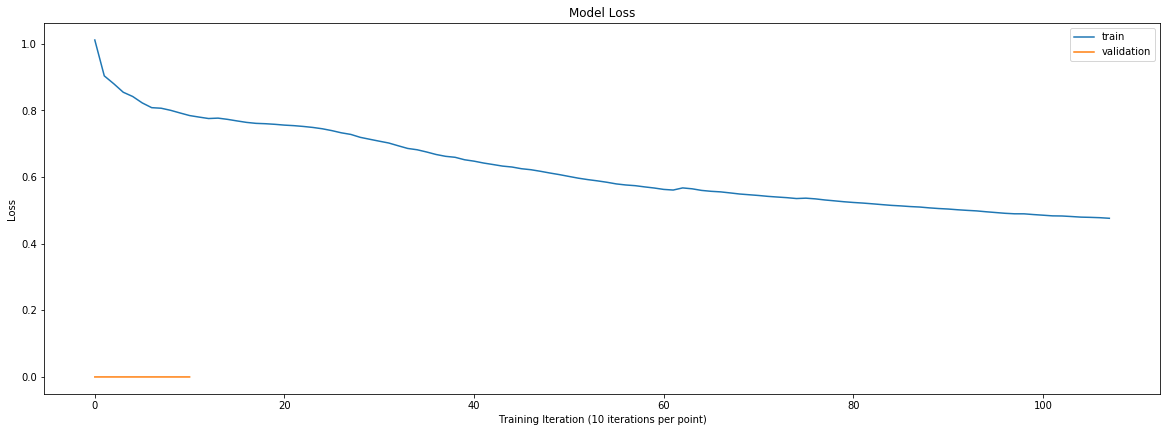

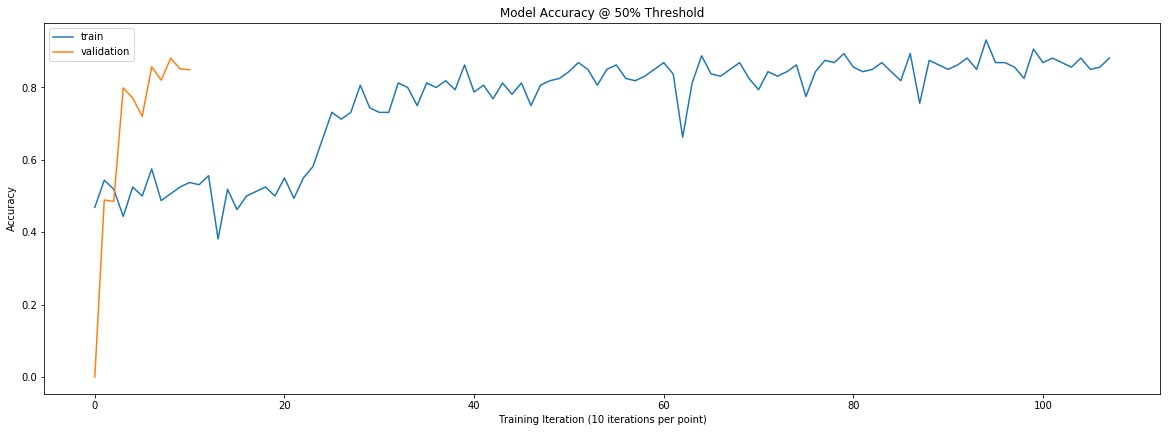

{   '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '0',
    '--embed-size': '256',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '2',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': '16-juneAD-full',
    '--seed': '21',
    '--start-decrease': '100',
    '--test': False,
    '--valid-niter': '50',
    '--validate-every': '100'}


In [137]:
model_path = '16-juneAD-full'
model1, optim, lang, m1 = load(model_path, cpu=True, load_model=False)
plot_metrics(m1)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(m1['args'])

## Regular Dropout 1 Epoch
python train.py --seed=21 --batch-size=16 --hidden-size=384 --max-sent-len=512 --log-every=10 --validate-every=10 --valid-niter=10 --n-valid=200 --dropout=0.1 --n-heads=6 --n-layers=6 --lr=3e-5 --save-to=15june-dropout --save

Total Time: 865.7593 
Train Time: 514.276
Max (Validation, Train): (0.88, 0.92)


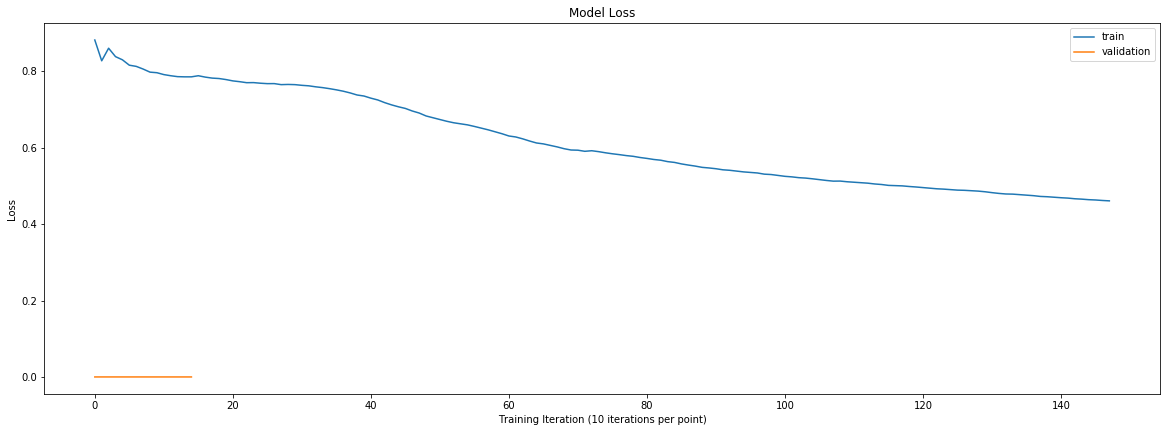

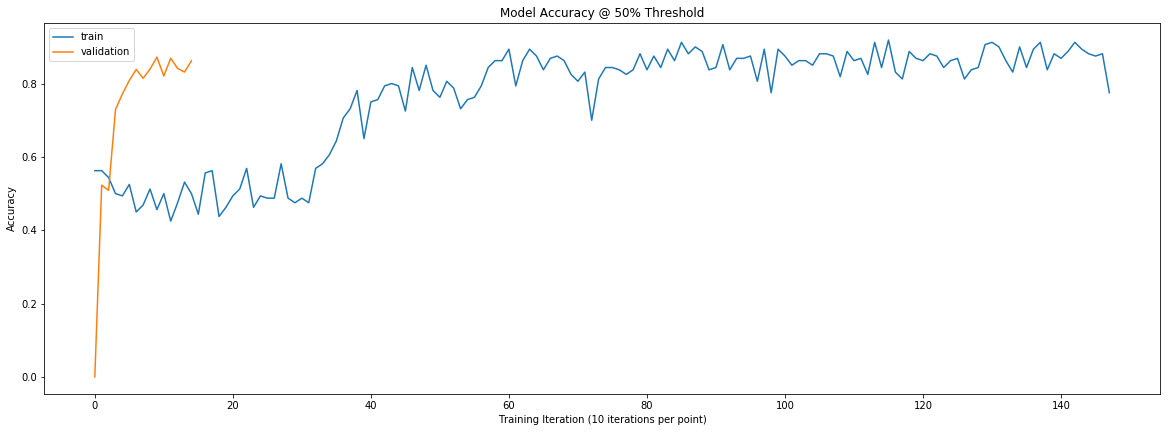

{   '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '0',
    '--embed-size': '256',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': '16-juneD-full',
    '--seed': '21',
    '--start-decrease': '100',
    '--test': False,
    '--valid-niter': '50',
    '--validate-every': '100'}


In [138]:
model_path = '16-juneD-full'
model2, optim, lang, m2 = load(model_path, cpu=True, load_model=False)
plot_metrics(m2)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(m2['args'])

## Test Data 6 Layer - Attenion Dropout vs Dropout 
*Note*: A 50% threshold was used at test time.  
> * Attention Dropout Test Accuracy: 0.8494 <br/>
> * Dropout Test Accuracy: 0.8354 <br/>

--------16-juneAD-full----------
Max (Validation, Train): (0.88, 0.93)
--------16-juneD-full----------
Max (Validation, Train): (0.87, 0.92)


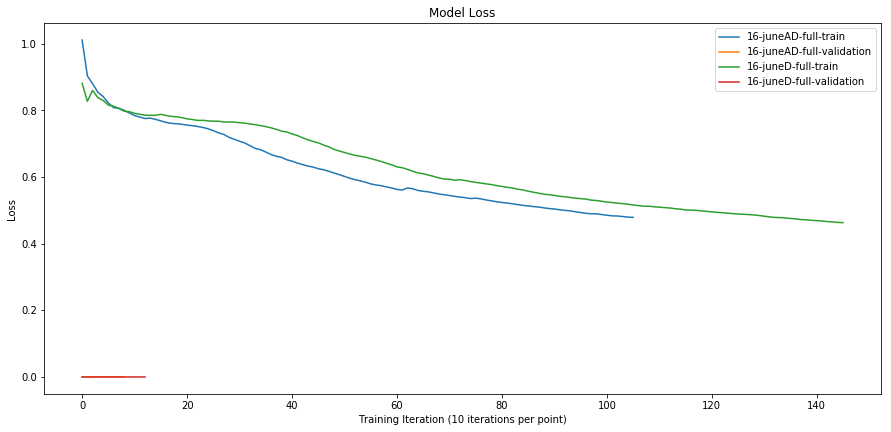

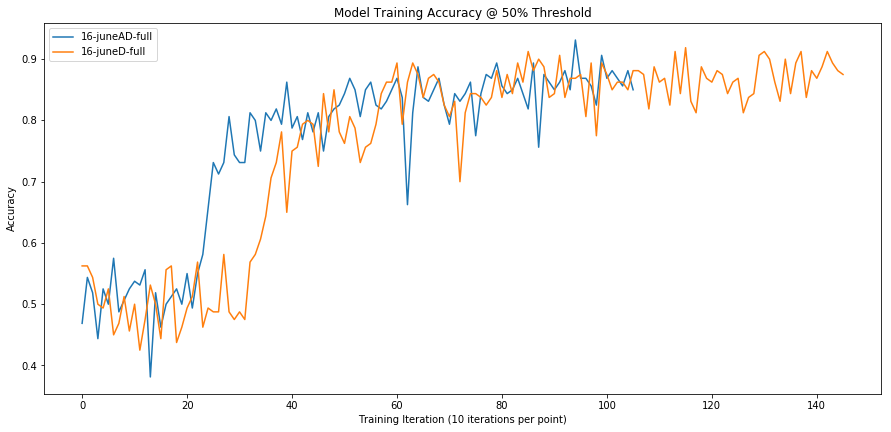

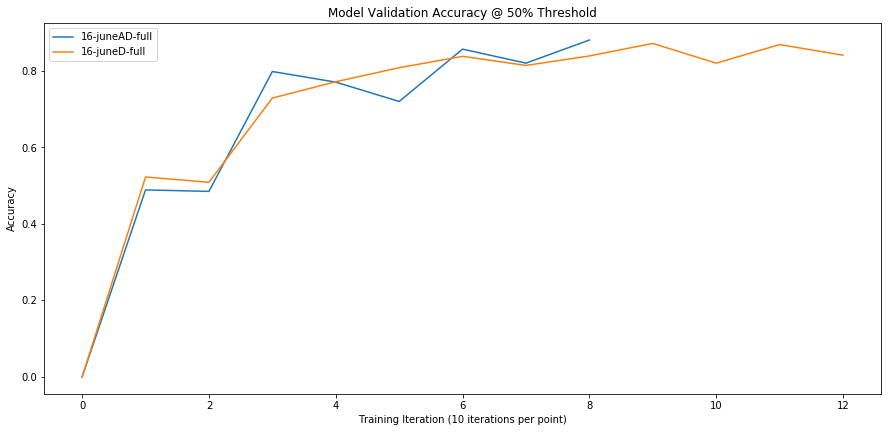

In [140]:
compare_metrics([m1, m2], first_n=-1)

# 12 Layer Model Comparison

## Attention Dropout

Total Time: 1415.5003 
Train Time: 939.0982
Max (Validation, Train): (0.88, 0.91)


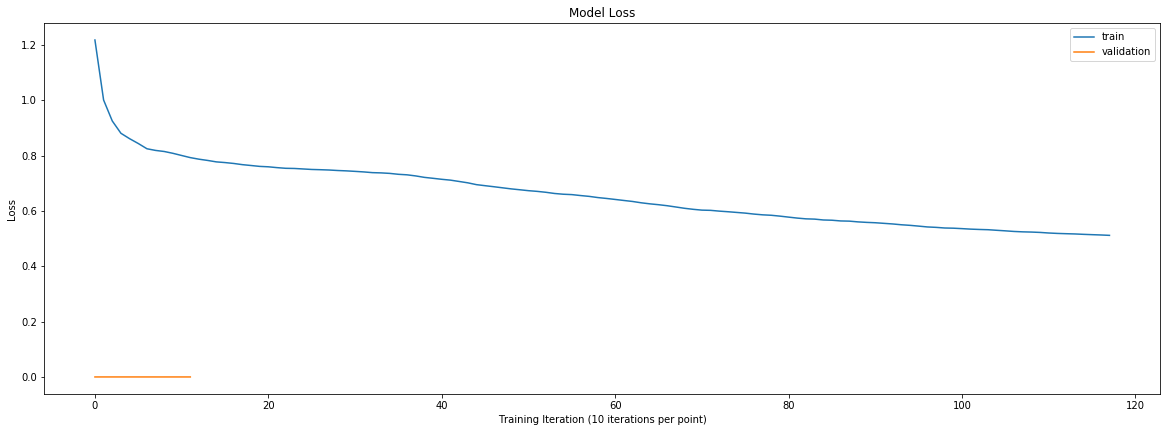

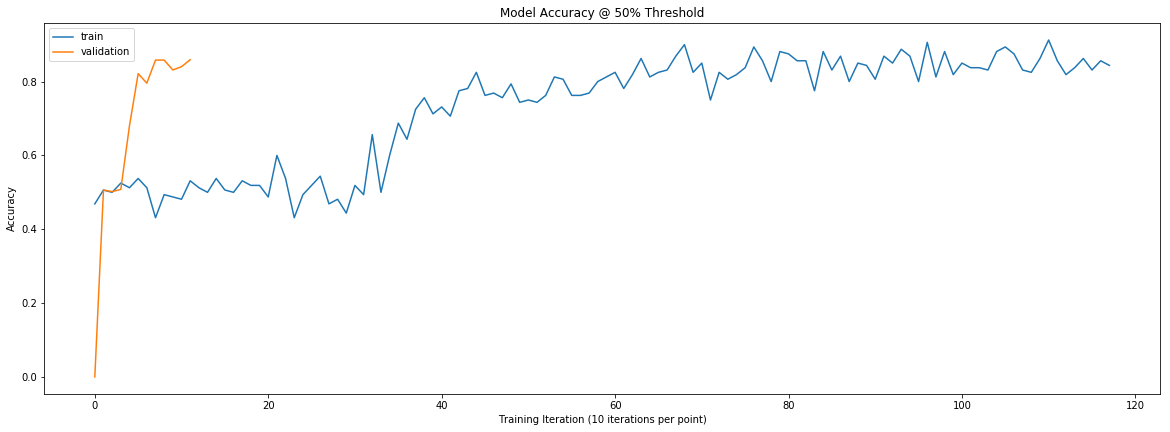

{   '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '0',
    '--embed-size': '256',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '12',
    '--n-layers': '12',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': '16-juneAD-12layer',
    '--seed': '21',
    '--start-decrease': '100',
    '--test': False,
    '--valid-niter': '50',
    '--validate-every': '100'}


In [141]:
model_path = '16-juneAD-12layer'
model1, optim, lang, m1 = load(model_path, cpu=True, load_model=False)
plot_metrics(m1)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(m1['args'])

Total Time: 1618.9184 
Train Time: 1025.1102
Max (Validation, Train): (0.54, 0.64)


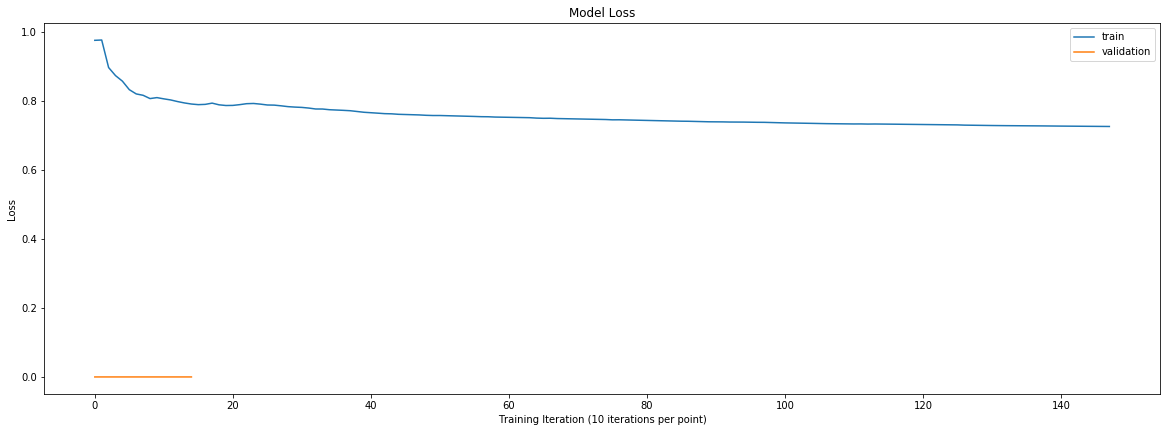

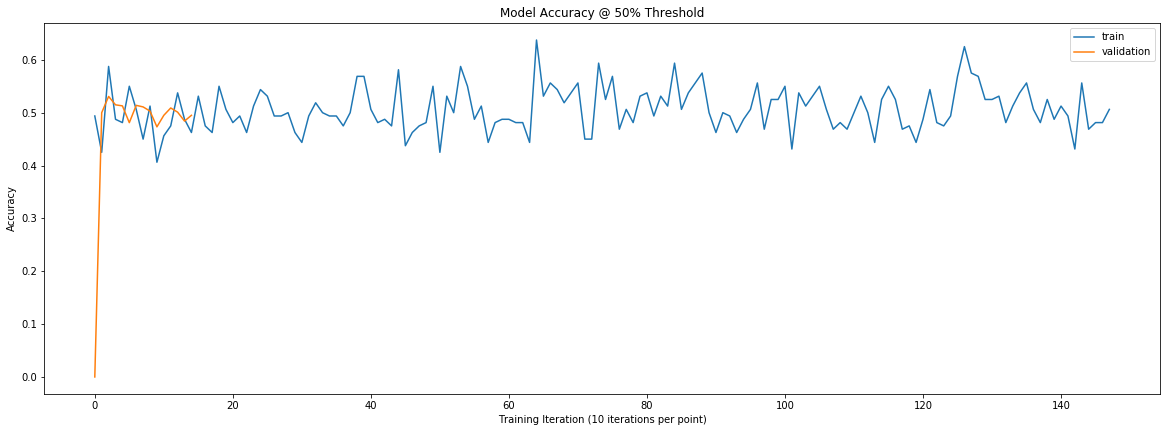

{   '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '0',
    '--embed-size': '256',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '12',
    '--n-layers': '12',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': '16-juneD-12layer',
    '--seed': '21',
    '--start-decrease': '100',
    '--test': False,
    '--valid-niter': '50',
    '--validate-every': '100'}


In [142]:
model_path = '16-juneD-12layer'
model2, optim, lang, m2 = load(model_path, cpu=True, load_model=False)
plot_metrics(m2)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(m2['args'])

## Test Data 12 Layer - Attenion Dropout vs Dropout 
*Note*: A 50% threshold was used at test time.  
> * Attention Dropout Test Accuracy: 0.8489 <br/>
> * Dropout Test Accuracy: 0.4865 <br/>

--------16-juneAD-12layer----------
Max (Validation, Train): (0.86, 0.91)
--------16-juneD-12layer----------
Max (Validation, Train): (0.53, 0.64)


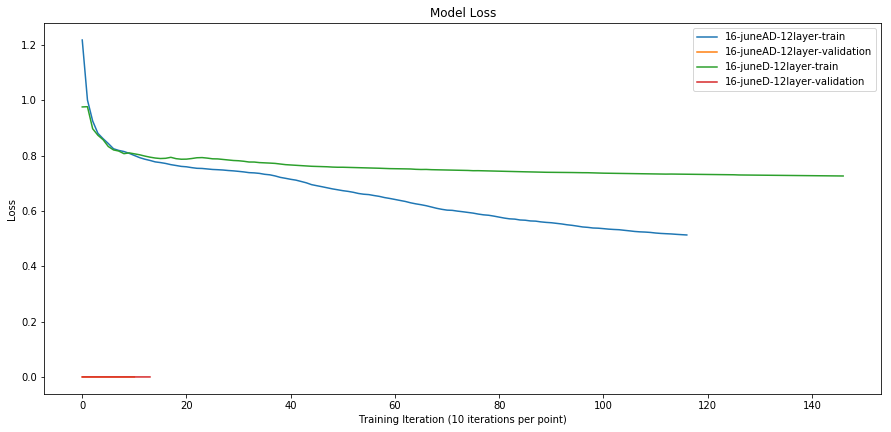

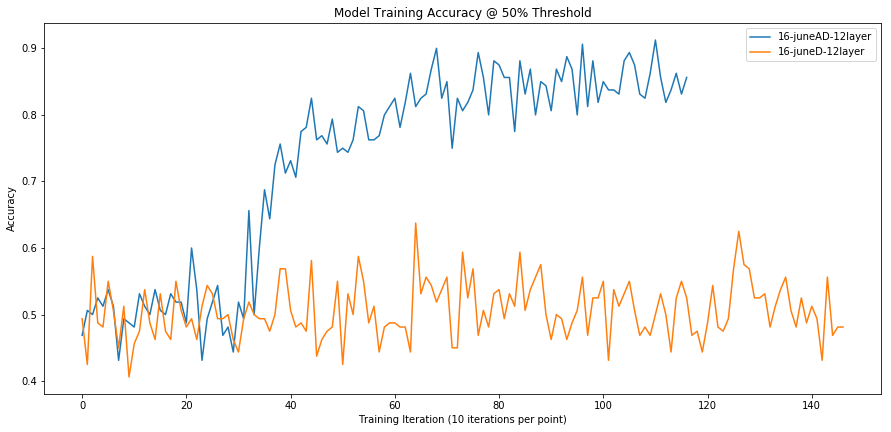

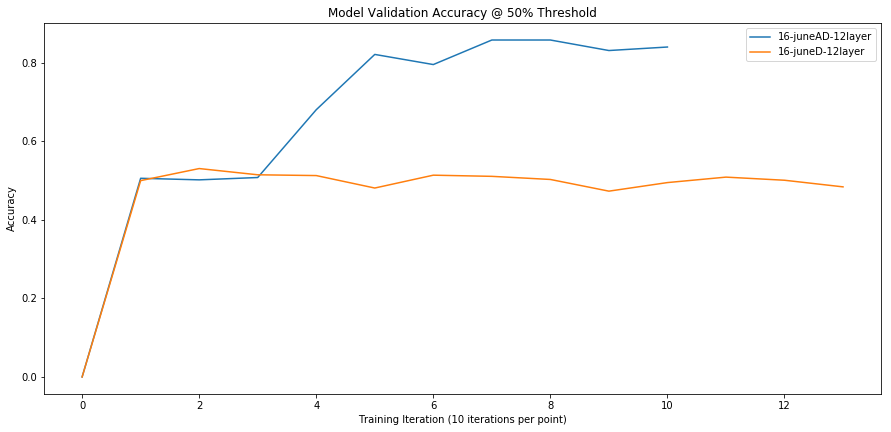

In [144]:
compare_metrics([m1, m2], first_n=-1)

# 2 Layer Model
When scaled down the two models have basically the same performance.

Total Time: 115.8111 
Train Time: 71.3727
Max (Validation, Train): (0.92, 0.82)


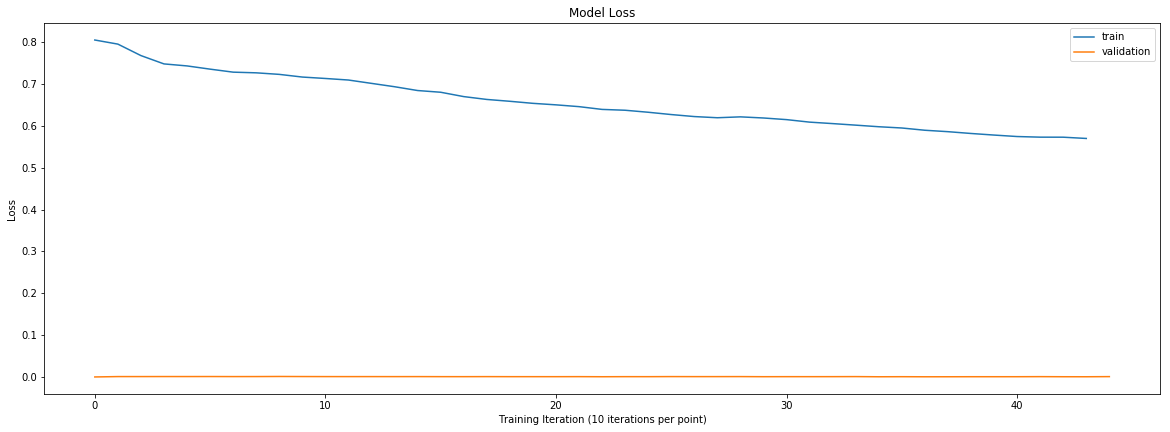

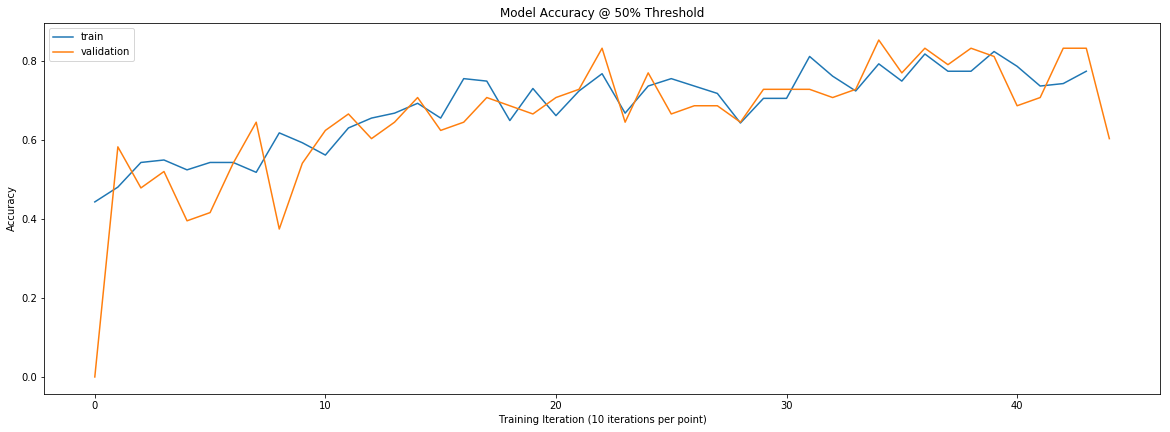

{   '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--dropout': '0.1',
    '--dset-size': '0',
    '--embed-size': '256',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '30',
    '--max-sent-len': '512',
    '--n-heads': '2',
    '--n-layers': '2',
    '--n-valid': '200',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': '15june-attention-dropout-2layer',
    '--seed': '21',
    '--valid-niter': '10',
    '--validate-every': '10'}


In [145]:
model_path = '15june-attention-dropout-2layer'
model1, optim, lang, m1 = load(model_path, cpu=True, load_model=False)
plot_metrics(m1)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(m1['args'])

Total Time: 103.7783 
Train Time: 60.6537
Max (Validation, Train): (0.96, 0.86)


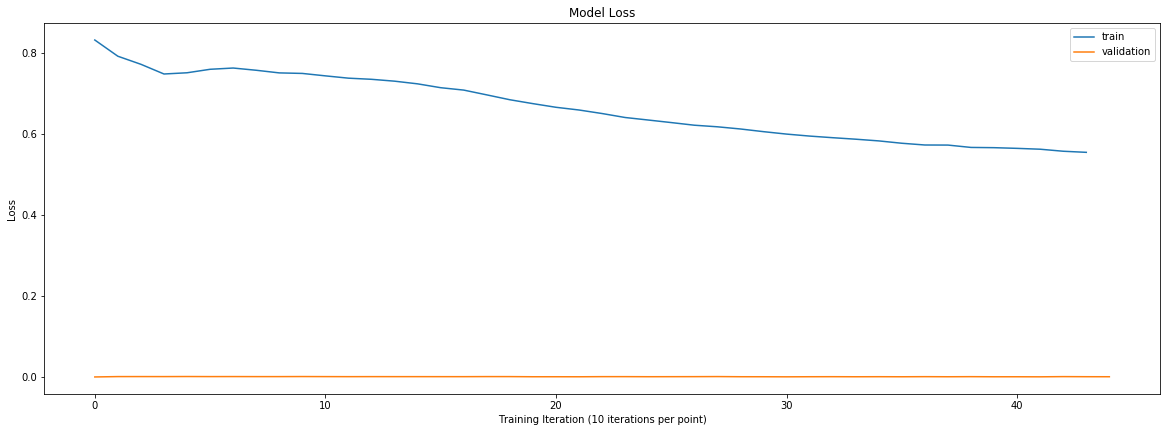

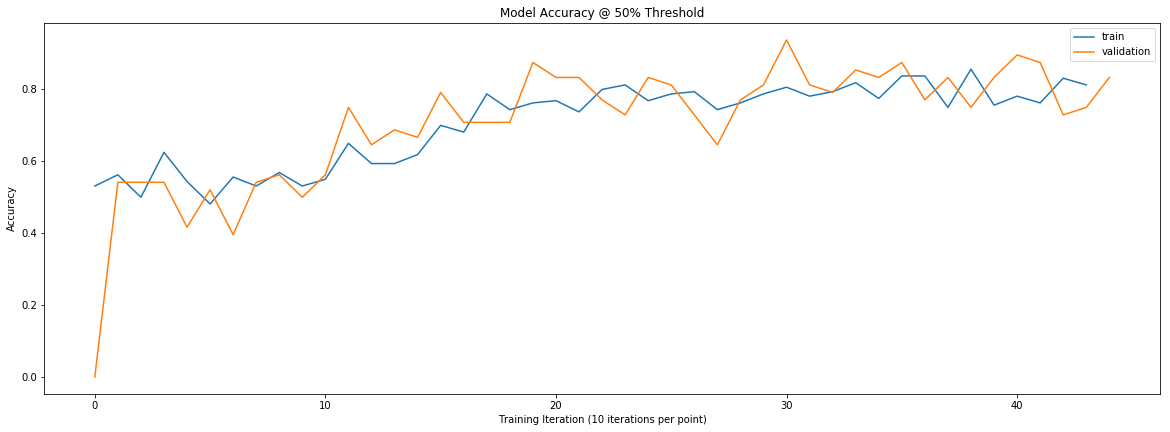

{   '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--dropout': '0.1',
    '--dset-size': '0',
    '--embed-size': '256',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '30',
    '--max-sent-len': '512',
    '--n-heads': '2',
    '--n-layers': '2',
    '--n-valid': '200',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': '15june-dropout-2layer',
    '--seed': '21',
    '--valid-niter': '10',
    '--validate-every': '10'}


In [146]:
model_path = '15june-dropout-2layer'
model2, optim, lang, m2 = load(model_path, cpu=True, load_model=False)
plot_metrics(m2)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(m2['args'])

--------15june-attention-dropout-2layer----------
Max (Validation, Train): (0.85, 0.82)
--------15june-dropout-2layer----------
Max (Validation, Train): (0.94, 0.86)


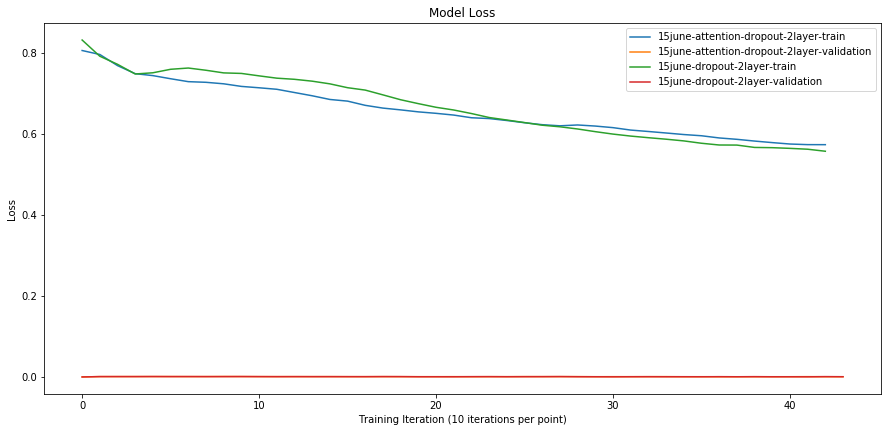

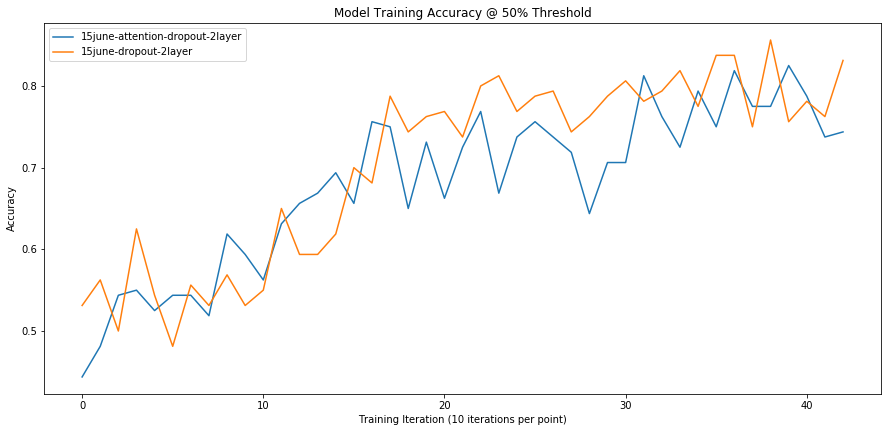

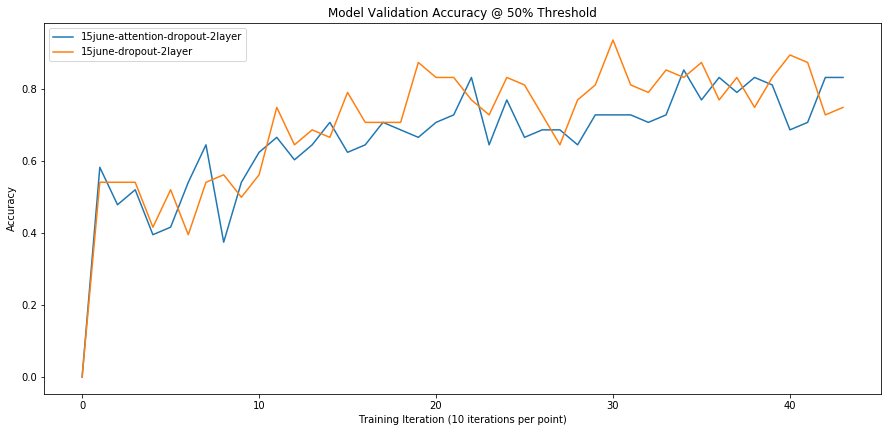

In [148]:
compare_metrics([m1, m2], first_n=-1)

# 12 Layer vs 6 Layer vs 2 Layer

--------16-juneAD-12layer----------
Max (Validation, Train): (0.86, 0.91)
--------15june-attention-dropout----------
Max (Validation, Train): (0.90, 0.82)
--------15june-dropout-2layer----------
Max (Validation, Train): (0.94, 0.86)


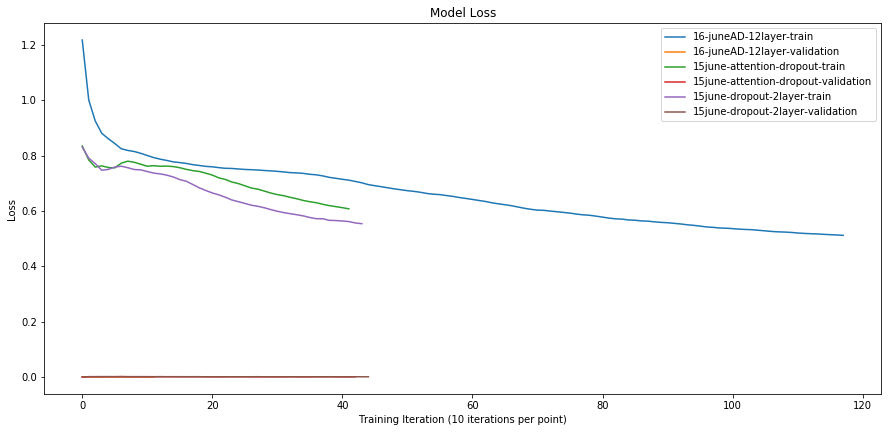

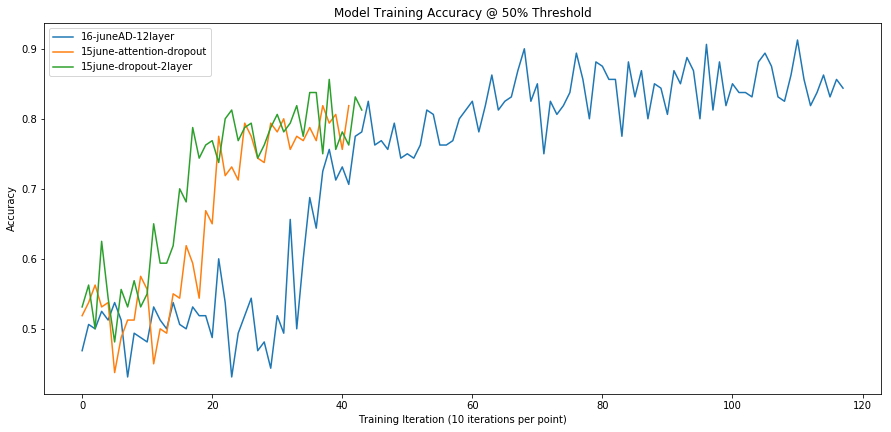

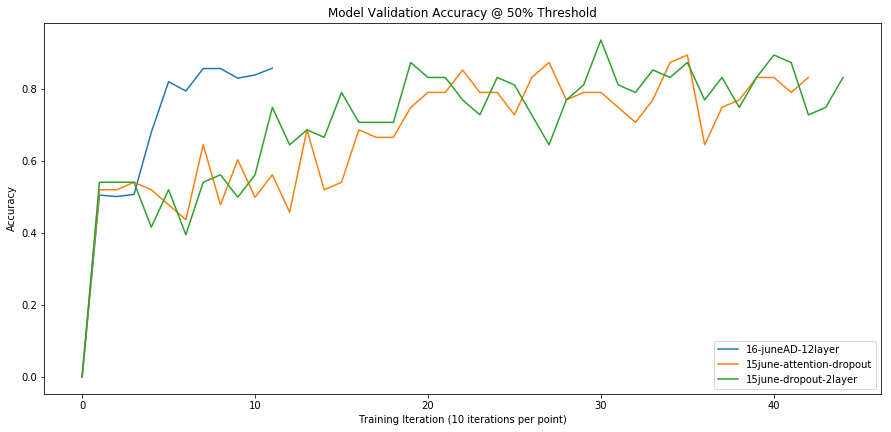

In [3]:
model_path = '16-juneAD-12layer'
model0, optim, lang, m0 = load(model_path, cpu=True, load_model=False)

model_path = '15june-attention-dropout'
model1, optim, lang, m1 = load(model_path, cpu=True, load_model=False)

model_path = '15june-dropout-2layer'
model2, optim, lang, m2 = load(model_path, cpu=True, load_model=False)

compare_metrics([m0, m1, m2], first_n=-1)

Seems like the model can learn on small data better when given a larger model

Test: 
- On a small subset of data with a small model (yet too large for the amount of data) we should get better & faster validation/train results


# Single Layer with 5K Training Examples

# 5 Full Epoch AD vs D With 5K
 >Test accuracy with dropouts de-activated (50% Threshold)
 * Attention Dropout: 0.8309
 * Attention Dropout With Frozen Layer Embeddings: 0.8261
 * Dropout: 0.8380

Total Time: 271.0756 
Train Time: 177.5256
Max (Validation, Train): (0.92, 0.87)


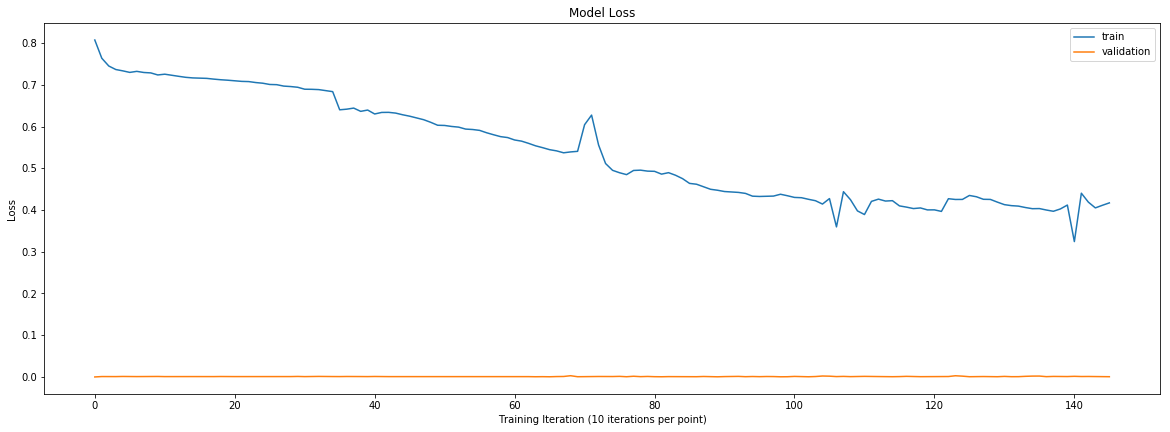

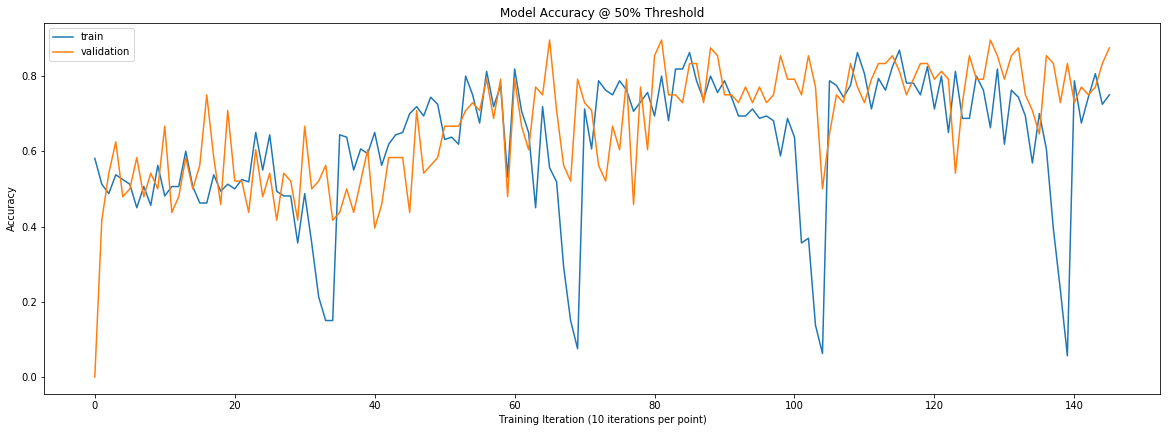

{   '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--dropout': '0.3',
    '--dset-size': '5000',
    '--embed-size': '256',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '5',
    '--max-sent-len': '512',
    '--n-heads': '1',
    '--n-layers': '1',
    '--n-valid': '200',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': '15june-1734-AD-1layer5K',
    '--seed': '21',
    '--test': False,
    '--valid-niter': '10',
    '--validate-every': '10'}


In [153]:
model_path = '15june-1734-AD-1layer5K'
model1, optim, lang, m1 = load(model_path, cpu=True, load_model=False)
plot_metrics(m1)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(m1['args'])

Total Time: 259.0246 
Train Time: 162.8699
Max (Validation, Train): (0.96, 0.95)


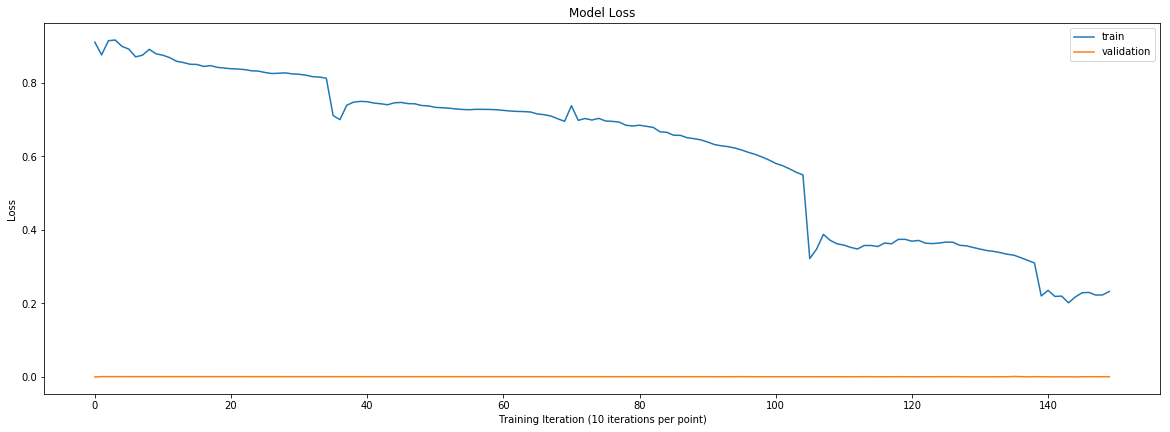

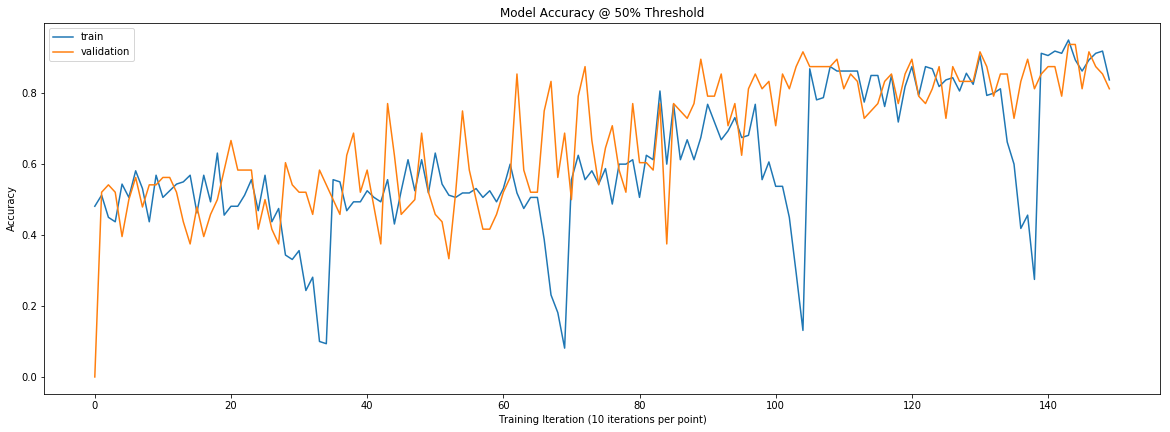

{   '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--dropout': '0.3',
    '--dset-size': '5000',
    '--embed-size': '256',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '5',
    '--max-sent-len': '512',
    '--n-heads': '1',
    '--n-layers': '1',
    '--n-valid': '200',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': '15june-1725-D-1layer5K',
    '--seed': '21',
    '--test': False,
    '--valid-niter': '10',
    '--validate-every': '10'}


In [154]:
model_path = '15june-1725-D-1layer5K'
model2, optim, lang, m2 = load(model_path, cpu=True, load_model=False)
plot_metrics(m2)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(m2['args'])

Total Time: 157.0798 
Train Time: 100.647
Max (Validation, Train): (0.94, 0.80)


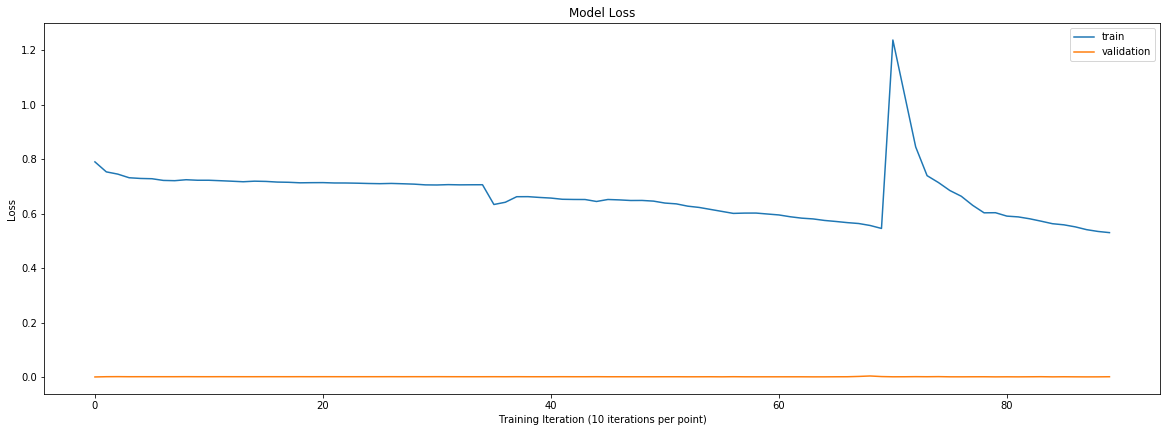

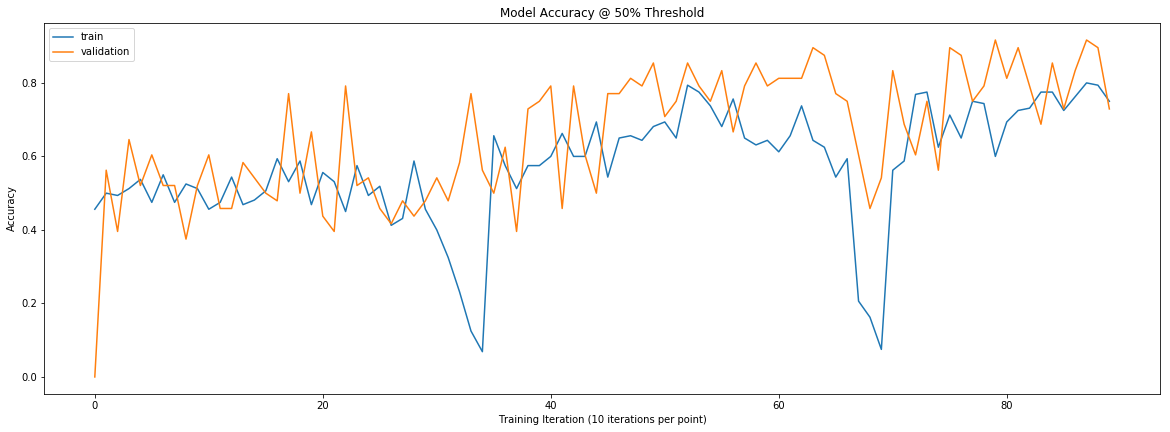

{   '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--dropout': '0.3',
    '--dset-size': '5000',
    '--embed-size': '256',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '5',
    '--max-sent-len': '512',
    '--n-heads': '1',
    '--n-layers': '1',
    '--n-valid': '200',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': '15june-AD-frozenlb-1layer5K',
    '--seed': '21',
    '--test': False,
    '--valid-niter': '10',
    '--validate-every': '10'}


In [156]:
model_path = '15june-AD-frozenlb-1layer5K'
model3, optim, lang, m3 = load(model_path, cpu=True, load_model=False)
plot_metrics(m3)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(m3['args'])

--------15june-1734-AD-1layer5K----------
Max (Validation, Train): (0.90, 0.87)
--------15june-1725-D-1layer5K----------
Max (Validation, Train): (0.94, 0.95)
--------15june-AD-frozenlb-1layer5K----------
Max (Validation, Train): (0.92, 0.80)


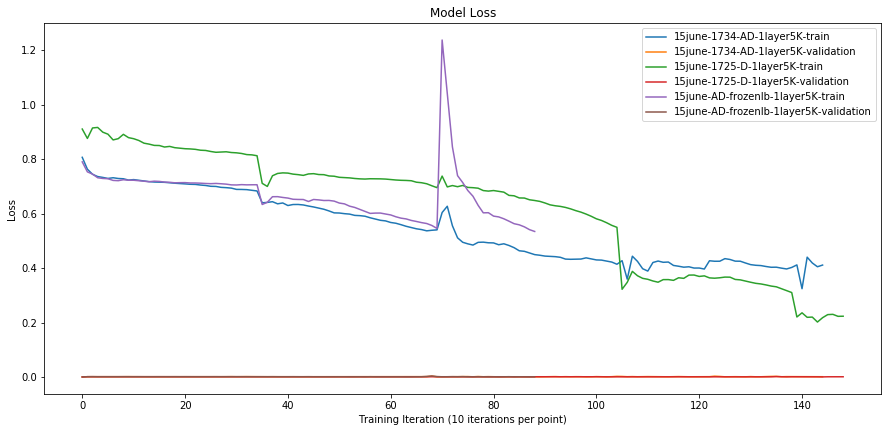

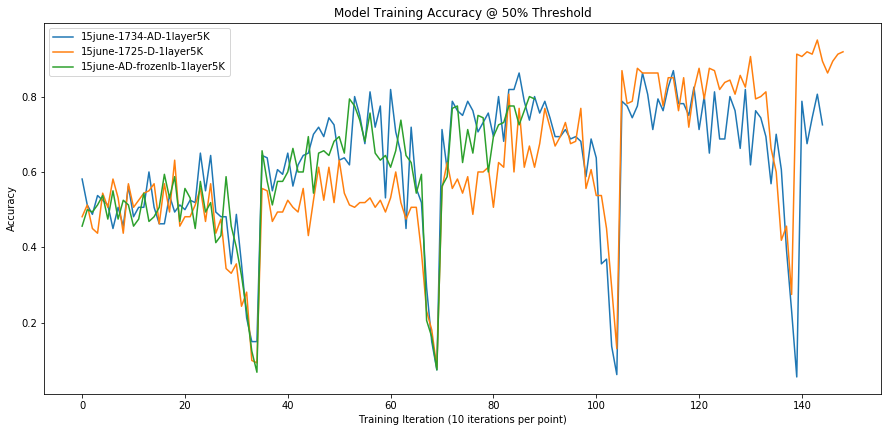

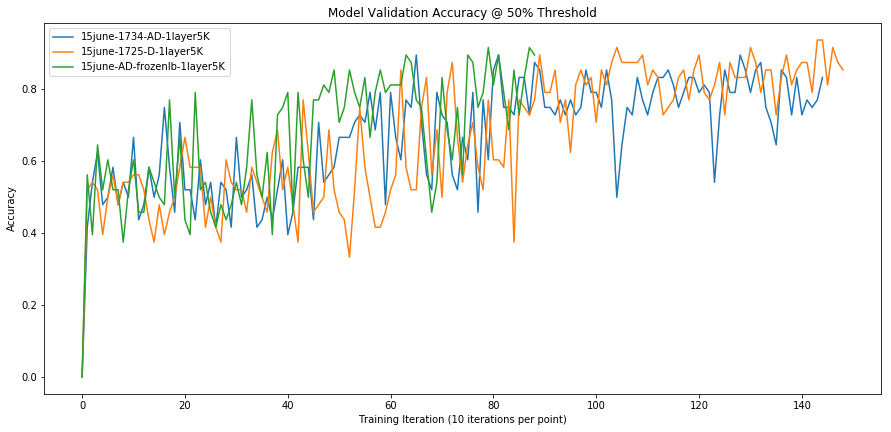

In [157]:
compare_metrics([m1, m2, m3], first_n=-1)

# 1 Full Epoch AD vs D With 5K
 > Test accuracy with dropouts de-activated (50% Threshold)
 * Attention Dropout: 0.6704
 * Dropout: 0.5759

# 2 Full Epoch AD vs D With 5K
 > Test accuracy with dropouts de-activated (50% Threshold)
 * Attention Dropout: 0.7574
 * Dropout: 0.7367

# What is it dropping? 

In [5]:
model_path = '16-juneAD-12layer'
model1, optim, lang, m1 = load(model_path, cpu=True)

In [6]:
bs = 16
for sentences, targets in batch_iter(traindf, bs, process_full_df=True, shuffle=True):
    break

In [7]:
tracked_attention_weigths = []
def track(m, i, o): 
    tracked_attention_weigths.append(o)

In [8]:
for i in range(len(model1._modules.get('bert')._modules.get('transformer_blocks'))):
    mha_ad = model1._modules.get('bert')._modules.get('transformer_blocks')[i]._modules.get('input_sublayer')._modules.get('task_attention')
    ff_ad = model1._modules.get('bert')._modules.get('transformer_blocks')[i]._modules.get('output_sublayer')._modules.get('task_attention')
    mha_ad.register_forward_hook(track)
    ff_ad.register_forward_hook(track)

In [9]:
with torch.no_grad():
    y_pred = model1(sentences)

In [10]:
pred_y_np = y_pred.detach().numpy().squeeze()
for p, t in zip(pred_y_np, targets.detach().numpy()):
    print('Predicted: %.2f True: %.2f' % (p, t))

Predicted: 0.08 True: 0.00
Predicted: 0.84 True: 1.00
Predicted: 0.97 True: 1.00
Predicted: 0.01 True: 0.00
Predicted: 0.02 True: 0.00
Predicted: 0.98 True: 1.00
Predicted: 0.25 True: 0.00
Predicted: 0.00 True: 0.00
Predicted: 0.01 True: 0.00
Predicted: 0.38 True: 0.00
Predicted: 0.00 True: 0.00
Predicted: 0.98 True: 1.00
Predicted: 0.16 True: 0.00
Predicted: 0.99 True: 1.00
Predicted: 0.01 True: 0.00
Predicted: 0.98 True: 1.00


In [55]:
batch_index = 0
attention_weights = 0
attention = tracked_attention_weigths[attention_weights][:, batch_index, :].detach().numpy().transpose()
attention.shape

(1, 512)

In [24]:
batch_index = 0
attention_weights = 1

for attention_weights in range(len(tracked_attention_weigths)):
    attention = tracked_attention_weigths[attention_weights][:, batch_index, :].detach().numpy().transpose()
    print("Words Dropped Layer {}:".format(attention_weights))
    for a, w in zip(attention.squeeze(), tokenizer.tokenize(sentences[batch_index])):
        if a == 0: print(w)
    print()

Words Dropped Layer 0:
jeff
lowell
minus
delivers
rudd
jaded
looks
jason
wasted
sloane

Words Dropped Layer 1:
poorly
idea
stale
execution
cherry
cake
minus
hardly
looks
delivers
looks
jaded
interested
.
looks
delivers
performance
jason
wasted
lindsay
sloane
.
entertained

Words Dropped Layer 2:
jeff
body
poorly
.
idea
stale
jokes
cherry
cake
.
hardly
anything
film
delivers
performance
paul
looks
interested
bell
complete
miscast
looks
manly
delivers
average
performance
jason
wasted
lindsay
.
film
.
entertained
.

Words Dropped Layer 3:
directed
dead
stale
cake
longoria
great
ever
.
bell
average
.
jason
biggs
sloane
film
.
sadly

Words Dropped Layer 4:
jeff
written
poorly
.
idea
first
stale
jokes
cake
.
minus
longoria
hardly
eva
great
ever
delivers
likable
performance
.
paul
looks
jaded
interested
lake
bell
complete
looks
manly
delivers
strictly
average
performance
jason
biggs
wasted
lindsay
sloane
.
expected
film
.
sadly
entertained
.

Words Dropped Layer 5:
jeff
body
stale
.
longoria


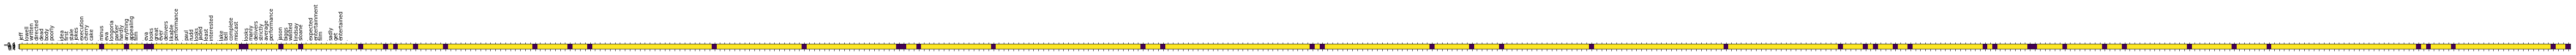

In [26]:
fig = plt.figure(figsize=(90, 90))
ax = fig.add_subplot(1, 1, 1)
ax.matshow(attention, cmap='viridis')
ax.set_xticklabels([''] + tokenizer.tokenize(sentences[batch_index]), rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()